In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
import pandas as pd

dataset = pd.read_csv("synthetic_resumes_10000.csv")



In [3]:
dataset.head()


,id,name,email,phone,location,target_job_title,summary,education,experience_years,experience_details,skills,certifications,last_updated
0,1,Vihaan Sharma,vihaan.sharma251@gmail.com,9321819600,"Gurgaon, India",Machine Learning Engineer,Passionate Machine Learning Engineer with 3 ye...,"M.Tech Computer Science, Delhi University (2017)",3,2022-2025: Machine Learning Engineer at DataWo...,Azure;Git;Python;Tableau;PyTorch,IBM Data Science Professional Certificate,2025-09-19
1,2,Ishaan Gupta,ishaan.gupta981@mail.com,9511615594,"Mumbai, India",Data Scientist,11-year experienced Data Scientist with strong...,"M.Tech Computer Science, NIT (2021)",11,2014-2025: Data Scientist at Analytica Labs: W...,Tableau;NumPy;Docker;Pandas;Model Deployment;D...,DataCamp Data Scientist,2025-09-19
2,3,Krishna Kumar,krishna.kumar285@yahoo.com,9752553419,"Noida, India",QA Engineer,Passionate QA Engineer with 2 years experience...,"M.Sc. Statistics, IIT (2023)",2,2023-2025: QA Engineer at ABC Tech: Worked on ...,Regex;Keras;TensorFlow;AWS;Docker;Machine Lear...,Coursera ML,2025-09-19
3,4,Ishaan Singh,ishaan.singh936@mail.com,9953767242,"Hyderabad, India",Business Analyst,11-year experienced Business Analyst with stro...,"B.Sc. Computer Science, VIT (2018)",11,2014-2025: Business Analyst at ABC Tech: Worke...,Tableau;Machine Learning;Regex;Power BI;Kubern...,Coursera ML,2025-09-19
4,5,Reyansh Malhotra,reyansh.malhotra66@outlook.com,9669784801,"Delhi, India",QA Engineer,"QA Engineer skilled in Data Visualization, Lin...","BCA, Delhi University (2010)",8,2022-2025: QA Engineer at DataWorks: Worked on...,Data Visualization;Linux;NLP;NumPy;Deep Learni...,Azure AI Engineer,2025-09-19


In [4]:
import re
from pdfminer.high_level import extract_text


def extract_text_from_pdf(pdf_path):
    return extract_text(pdf_path)


resume_path = "resume.pdf"
text = extract_text_from_pdf(resume_path)
text

'John Doe\n\nEmail: johndoe@example.com\n\nPhone: +1 234 567 8901\n\nEducation\n\nMaster of Science in Data Science - ABC University (2022)\n\nBachelor of Computer Science - XYZ College (2020)\n\nSkills\n\nPython, Machine Learning, Deep Learning, SQL, Pandas, NumPy, Scikit-learn, TensorFlow, Data Visualization\n\nExperience\n\nData Science Intern - TechCorp (Jun 2022 - Dec 2022)\n\n- Built ML models for predicting customer churn.\n\n- Worked with large datasets using Pandas and SQL.\n\n- Created visual dashboards using Matplotlib.\n\n\x0c'

In [5]:
import re

def extract_contact_number_from_resume(text):
    contact_number = None

    # Use regex pattern to find a potential contact number
    pattern = r"\b(?:\+?\d{1,3}[-.\s]?)?\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}\b"
    match = re.search(pattern, text)
    if match:
        contact_number = match.group()

    return contact_number

phone = extract_contact_number_from_resume(text)
phone

'1 234 567 8901'

In [6]:
import re

def extract_email_from_resume(text):
    email = None

    # Use regex pattern to find a potential email address
    pattern = r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b"
    match = re.search(pattern, text)
    if match:
        email = match.group()

    return email

email = extract_email_from_resume(text)
email

'johndoe@example.com'

In [7]:
import re

def extract_skills_from_resume(text, skills_list):
    skills = []

    for skill in skills_list:
        pattern = r"\b{}\b".format(re.escape(skill))
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            skills.append(skill)

    return skills


# List of predefined skills
skills_list = [
    'Python', 'Data Analysis', 'Machine Learning', 'Communication', 'Project Management', 'Deep Learning', 'SQL', 'Tableau',
    'Java', 'C++', 'JavaScript', 'HTML', 'CSS', 'React', 'Angular', 'Node.js', 'MongoDB', 'Express.js', 'Git',
    'Research', 'Statistics', 'Quantitative Analysis', 'Qualitative Analysis', 'SPSS', 'R', 'Data Visualization', 'Matplotlib',
    'Seaborn', 'Plotly', 'Pandas', 'Numpy', 'Scikit-learn', 'TensorFlow', 'Keras', 'PyTorch', 'NLTK', 'Text Mining',
    'Natural Language Processing', 'Computer Vision', 'Image Processing', 'OCR', 'Speech Recognition', 'Recommendation Systems',
    'Collaborative Filtering', 'Content-Based Filtering', 'Reinforcement Learning', 'Neural Networks', 'Convolutional Neural Networks',
    'Recurrent Neural Networks', 'Generative Adversarial Networks', 'XGBoost', 'Random Forest', 'Decision Trees', 'Support Vector Machines',
    'Linear Regression', 'Logistic Regression', 'K-Means Clustering', 'Hierarchical Clustering', 'DBSCAN', 'Association Rule Learning',
    'Apache Hadoop', 'Apache Spark', 'MapReduce', 'Hive', 'HBase', 'Apache Kafka', 'Data Warehousing', 'ETL', 'Big Data Analytics',
    'Cloud Computing', 'Amazon Web Services (AWS)', 'Microsoft Azure', 'Google Cloud Platform (GCP)', 'Docker', 'Kubernetes', 'Linux',
    'Shell Scripting', 'Cybersecurity', 'Network Security', 'Penetration Testing', 'Firewalls', 'Encryption', 'Malware Analysis',
    'Digital Forensics', 'CI/CD', 'DevOps', 'Agile Methodology', 'Scrum', 'Kanban', 'Continuous Integration', 'Continuous Deployment',
    'Software Development', 'Web Development', 'Mobile Development', 'Backend Development', 'Frontend Development', 'Full-Stack Development',
    'UI/UX Design', 'Responsive Design', 'Wireframing', 'Prototyping', 'User Testing', 'Adobe Creative Suite', 'Photoshop', 'Illustrator',
    'InDesign', 'Figma', 'Sketch', 'Zeplin', 'InVision', 'Product Management', 'Market Research', 'Customer Development', 'Lean Startup',
    'Business Development', 'Sales', 'Marketing', 'Content Marketing', 'Social Media Marketing', 'Email Marketing', 'SEO', 'SEM', 'PPC',
    'Google Analytics', 'Facebook Ads', 'LinkedIn Ads', 'Lead Generation', 'Customer Relationship Management (CRM)', 'Salesforce',
    'HubSpot', 'Zendesk', 'Intercom', 'Customer Support', 'Technical Support', 'Troubleshooting', 'Ticketing Systems', 'ServiceNow',
    'ITIL', 'Quality Assurance', 'Manual Testing', 'Automated Testing', 'Selenium', 'JUnit', 'Load Testing', 'Performance Testing',
    'Regression Testing', 'Black Box Testing', 'White Box Testing', 'API Testing', 'Mobile Testing', 'Usability Testing', 'Accessibility Testing',
    'Cross-Browser Testing', 'Agile Testing', 'User Acceptance Testing', 'Software Documentation', 'Technical Writing', 'Copywriting',
    'Editing', 'Proofreading', 'Content Management Systems (CMS)', 'WordPress', 'Joomla', 'Drupal', 'Magento', 'Shopify', 'E-commerce',
    'Payment Gateways', 'Inventory Management', 'Supply Chain Management', 'Logistics', 'Procurement', 'ERP Systems', 'SAP', 'Oracle',
    'Microsoft Dynamics', 'Tableau', 'Power BI', 'QlikView', 'Looker', 'Data Warehousing', 'ETL', 'Data Engineering', 'Data Governance',
    'Data Quality', 'Master Data Management', 'Predictive Analytics', 'Prescriptive Analytics', 'Descriptive Analytics', 'Business Intelligence',
    'Dashboarding', 'Reporting', 'Data Mining', 'Web Scraping', 'API Integration', 'RESTful APIs', 'GraphQL', 'SOAP', 'Microservices',
    'Serverless Architecture', 'Lambda Functions', 'Event-Driven Architecture', 'Message Queues', 'GraphQL', 'Socket.io', 'WebSockets'
'Ruby', 'Ruby on Rails', 'PHP', 'Symfony', 'Laravel', 'CakePHP', 'Zend Framework', 'ASP.NET', 'C#', 'VB.NET', 'ASP.NET MVC', 'Entity Framework',
    'Spring', 'Hibernate', 'Struts', 'Kotlin', 'Swift', 'Objective-C', 'iOS Development', 'Android Development', 'Flutter', 'React Native', 'Ionic',
    'Mobile UI/UX Design', 'Material Design', 'SwiftUI', 'RxJava', 'RxSwift', 'Django', 'Flask', 'FastAPI', 'Falcon', 'Tornado', 'WebSockets',
    'GraphQL', 'RESTful Web Services', 'SOAP', 'Microservices Architecture', 'Serverless Computing', 'AWS Lambda', 'Google Cloud Functions',
    'Azure Functions', 'Server Administration', 'System Administration', 'Network Administration', 'Database Administration', 'MySQL', 'PostgreSQL',
    'SQLite', 'Microsoft SQL Server', 'Oracle Database', 'NoSQL', 'MongoDB', 'Cassandra', 'Redis', 'Elasticsearch', 'Firebase', 'Google Analytics',
    'Google Tag Manager', 'Adobe Analytics', 'Marketing Automation', 'Customer Data Platforms', 'Segment', 'Salesforce Marketing Cloud', 'HubSpot CRM',
    'Zapier', 'IFTTT', 'Workflow Automation', 'Robotic Process Automation (RPA)', 'UI Automation', 'Natural Language Generation (NLG)',
    'Virtual Reality (VR)', 'Augmented Reality (AR)', 'Mixed Reality (MR)', 'Unity', 'Unreal Engine', '3D Modeling', 'Animation', 'Motion Graphics',
    'Game Design', 'Game Development', 'Level Design', 'Unity3D', 'Unreal Engine 4', 'Blender', 'Maya', 'Adobe After Effects', 'Adobe Premiere Pro',
    'Final Cut Pro', 'Video Editing', 'Audio Editing', 'Sound Design', 'Music Production', 'Digital Marketing', 'Content Strategy', 'Conversion Rate Optimization (CRO)',
    'A/B Testing', 'Customer Experience (CX)', 'User Experience (UX)', 'User Interface (UI)', 'Persona Development', 'User Journey Mapping', 'Information Architecture (IA)',
    'Wireframing', 'Prototyping', 'Usability Testing', 'Accessibility Compliance', 'Internationalization (I18n)', 'Localization (L10n)', 'Voice User Interface (VUI)',
    'Chatbots', 'Natural Language Understanding (NLU)', 'Speech Synthesis', 'Emotion Detection', 'Sentiment Analysis', 'Image Recognition', 'Object Detection',
    'Facial Recognition', 'Gesture Recognition', 'Document Recognition', 'Fraud Detection', 'Cyber Threat Intelligence', 'Security Information and Event Management (SIEM)',
    'Vulnerability Assessment', 'Incident Response', 'Forensic Analysis', 'Security Operations Center (SOC)', 'Identity and Access Management (IAM)', 'Single Sign-On (SSO)',
    'Multi-Factor Authentication (MFA)', 'Blockchain', 'Cryptocurrency', 'Decentralized Finance (DeFi)', 'Smart Contracts', 'Web3', 'Non-Fungible Tokens (NFTs)']

extracted_skills = extract_skills_from_resume(text, skills_list)

if extracted_skills:
    print("Skills:", extracted_skills)
else:
    print("No skills found")

Skills: ['Python', 'Machine Learning', 'Deep Learning', 'SQL', 'Data Visualization', 'Matplotlib', 'Pandas', 'Numpy', 'Scikit-learn', 'TensorFlow']


In [8]:
import re

def extract_education_from_resume(text):
    education = []

    # List of education keywords to match against
    education_keywords = [
        'Computer Science', 'Information Technology', 'Software Engineering', 'Electrical Engineering', 'Mechanical Engineering', 'Civil Engineering',
        'Chemical Engineering', 'Biomedical Engineering', 'Aerospace Engineering', 'Nuclear Engineering', 'Industrial Engineering', 'Systems Engineering',
        'Environmental Engineering', 'Petroleum Engineering', 'Geological Engineering', 'Marine Engineering', 'Robotics Engineering', 'Biotechnology',
        'Biochemistry', 'Microbiology', 'Genetics', 'Molecular Biology', 'Bioinformatics', 'Neuroscience', 'Biophysics', 'Biostatistics', 'Pharmacology',
        'Physiology', 'Anatomy', 'Pathology', 'Immunology', 'Epidemiology', 'Public Health', 'Health Administration', 'Nursing', 'Medicine', 'Dentistry',
        'Pharmacy', 'Veterinary Medicine', 'Medical Technology', 'Radiography', 'Physical Therapy', 'Occupational Therapy', 'Speech Therapy', 'Nutrition',
        'Sports Science', 'Kinesiology', 'Exercise Physiology', 'Sports Medicine', 'Rehabilitation Science', 'Psychology', 'Counseling', 'Social Work',
        'Sociology', 'Anthropology', 'Criminal Justice', 'Political Science', 'International Relations', 'Economics', 'Finance', 'Accounting', 'Business Administration',
        'Management', 'Marketing', 'Entrepreneurship', 'Hospitality Management', 'Tourism Management', 'Supply Chain Management', 'Logistics Management',
        'Operations Management', 'Human Resource Management', 'Organizational Behavior', 'Project Management', 'Quality Management', 'Risk Management',
        'Strategic Management', 'Public Administration', 'Urban Planning', 'Architecture', 'Interior Design', 'Landscape Architecture', 'Fine Arts',
        'Visual Arts', 'Graphic Design', 'Fashion Design', 'Industrial Design', 'Product Design', 'Animation', 'Film Studies', 'Media Studies',
        'Communication Studies', 'Journalism', 'Broadcasting', 'Creative Writing', 'English Literature', 'Linguistics', 'Translation Studies',
        'Foreign Languages', 'Modern Languages', 'Classical Studies', 'History', 'Archaeology', 'Philosophy', 'Theology', 'Religious Studies',
        'Ethics', 'Education', 'Early Childhood Education', 'Elementary Education', 'Secondary Education', 'Special Education', 'Higher Education',
        'Adult Education', 'Distance Education', 'Online Education', 'Instructional Design', 'Curriculum Development'
        'Library Science', 'Information Science', 'Computer Engineering', 'Software Development', 'Cybersecurity', 'Information Security',
        'Network Engineering', 'Data Science', 'Data Analytics', 'Business Analytics', 'Operations Research', 'Decision Sciences',
        'Human-Computer Interaction', 'User Experience Design', 'User Interface Design', 'Digital Marketing', 'Content Strategy',
        'Brand Management', 'Public Relations', 'Corporate Communications', 'Media Production', 'Digital Media', 'Web Development',
        'Mobile App Development', 'Game Development', 'Virtual Reality', 'Augmented Reality', 'Blockchain Technology', 'Cryptocurrency',
        'Digital Forensics', 'Forensic Science', 'Criminalistics', 'Crime Scene Investigation', 'Emergency Management', 'Fire Science',
        'Environmental Science', 'Climate Science', 'Meteorology', 'Geography', 'Geomatics', 'Remote Sensing', 'Geoinformatics',
        'Cartography', 'GIS (Geographic Information Systems)', 'Environmental Management', 'Sustainability Studies', 'Renewable Energy',
        'Green Technology', 'Ecology', 'Conservation Biology', 'Wildlife Biology', 'Zoology']

    for keyword in education_keywords:
        pattern = r"(?i)\b{}\b".format(re.escape(keyword))
        match = re.search(pattern, text)
        if match:
            education.append(match.group())

    return education

extracted_education = extract_education_from_resume(text)
if extracted_education:
    print("Education:", extracted_education)
else:
    print("No education information found")

Education: ['Computer Science', 'Education', 'Data Science']


In [9]:
def extract_name_from_resume(text):
    name = None

    # Use regex pattern to find a potential name
    pattern = r"(\b[A-Z][a-z]+\b)\s(\b[A-Z][a-z]+\b)"
    match = re.search(pattern, text)
    if match:
        name = match.group()

    return name

name = extract_name_from_resume(text)

if name:
    print("Name:", name)
else:
    print("Name not found")

Name: John Doe


In [10]:


# Load dataset
df = pd.read_csv(r"C:\Users\dellll\Downloads\synthetic_resumes_10000.csv")

# Extract the columns you want
new_dataset = df[["id","target_job_title","summary","education","skills"]]

# Save to CSV
new_dataset.to_csv("synthetic_resumes_selected_columns.csv", index=False)




In [11]:
new_dataset.head()

,id,target_job_title,summary,education,skills
0,1,Machine Learning Engineer,Passionate Machine Learning Engineer with 3 ye...,"M.Tech Computer Science, Delhi University (2017)",Azure;Git;Python;Tableau;PyTorch
1,2,Data Scientist,11-year experienced Data Scientist with strong...,"M.Tech Computer Science, NIT (2021)",Tableau;NumPy;Docker;Pandas;Model Deployment;D...
2,3,QA Engineer,Passionate QA Engineer with 2 years experience...,"M.Sc. Statistics, IIT (2023)",Regex;Keras;TensorFlow;AWS;Docker;Machine Lear...
3,4,Business Analyst,11-year experienced Business Analyst with stro...,"B.Sc. Computer Science, VIT (2018)",Tableau;Machine Learning;Regex;Power BI;Kubern...
4,5,QA Engineer,"QA Engineer skilled in Data Visualization, Lin...","BCA, Delhi University (2010)",Data Visualization;Linux;NLP;NumPy;Deep Learni...


In [12]:
new_dataset.iloc[2].summary

'Passionate QA Engineer with 2 years experience in data-driven solutions using Regex, Keras, TensorFlow. Experienced in model deployment and data pipelines.'

In [13]:
new_dataset.count()

id                  10000
target_job_title    10000
summary             10000
education           10000
skills              10000
dtype: int64

In [14]:
new_dataset.isnull().sum()

id                  0
target_job_title    0
summary             0
education           0
skills              0
dtype: int64

In [15]:
new_dataset['target_job_title'].value_counts()

target_job_title
QA Engineer                  871
Machine Learning Engineer    866
Data Analyst                 858
Backend Developer            857
Frontend Developer           848
NLP Engineer                 841
Data Scientist               837
Business Analyst             813
DevOps Engineer              813
Software Engineer            806
Full Stack Developer         801
Computer Vision Engineer     789
Name: count, dtype: int64

In [16]:
new_dataset.iloc[0].summary

'Passionate Machine Learning Engineer with 3 years experience in data-driven solutions using Azure, Git, Python. Experienced in model deployment and data pipelines.'

In [17]:
new_dataset.head()

,id,target_job_title,summary,education,skills
0,1,Machine Learning Engineer,Passionate Machine Learning Engineer with 3 ye...,"M.Tech Computer Science, Delhi University (2017)",Azure;Git;Python;Tableau;PyTorch
1,2,Data Scientist,11-year experienced Data Scientist with strong...,"M.Tech Computer Science, NIT (2021)",Tableau;NumPy;Docker;Pandas;Model Deployment;D...
2,3,QA Engineer,Passionate QA Engineer with 2 years experience...,"M.Sc. Statistics, IIT (2023)",Regex;Keras;TensorFlow;AWS;Docker;Machine Lear...
3,4,Business Analyst,11-year experienced Business Analyst with stro...,"B.Sc. Computer Science, VIT (2018)",Tableau;Machine Learning;Regex;Power BI;Kubern...
4,5,QA Engineer,"QA Engineer skilled in Data Visualization, Lin...","BCA, Delhi University (2010)",Data Visualization;Linux;NLP;NumPy;Deep Learni...


In [18]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords once
nltk.download("stopwords")

# Define stop words
stop_words = set(stopwords.words("english"))

# Cleaning function
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)  # remove urls
    cleanText = re.sub('RT|cc', ' ', cleanText)  
    cleanText = re.sub('#\S+\s', ' ', cleanText)  # remove hashtags
    cleanText = re.sub('@\S+', ' ', cleanText)   # remove mentions
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)  # remove punctuation
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)  # remove non-ASCII
    cleanText = re.sub('\s+', ' ', cleanText)  # remove extra spaces
    return cleanText.strip()

# Function that also removes stopwords
def preprocess_resume(txt):
    txt = cleanResume(txt)
    txt = " ".join([word for word in txt.split() if word.lower() not in stop_words])
    return txt

# Apply cleaning to multiple columns
new_dataset["clean_summary"]        = new_dataset["summary"].apply(preprocess_resume)
new_dataset["clean_job_title"]      = new_dataset["target_job_title"].apply(preprocess_resume)
new_dataset["clean_education"]      = new_dataset["education"].apply(preprocess_resume)
new_dataset["clean_skills"]         = new_dataset["skills"].apply(preprocess_resume)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dellll\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\dellll\AppData\Local\Temp\ipykernel_14592\79201188.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset["clean_summary"]        = new_dataset["summary"].apply(preprocess_resume)
C:\Users\dellll\AppData\Local\Temp\ipykernel_14592\79201188.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset["clean_job_title"]      = n

In [19]:
new_dataset.iloc[4].skills

'Data Visualization;Linux;NLP;NumPy;Deep Learning;Kubernetes'

In [20]:
new_dataset.head()

,id,target_job_title,summary,education,skills,clean_summary,clean_job_title,clean_education,clean_skills
0,1,Machine Learning Engineer,Passionate Machine Learning Engineer with 3 ye...,"M.Tech Computer Science, Delhi University (2017)",Azure;Git;Python;Tableau;PyTorch,Passionate Machine Learning Engineer 3 years e...,Machine Learning Engineer,Tech Computer Science Delhi University 2017,Azure Git Python Tableau PyTorch
1,2,Data Scientist,11-year experienced Data Scientist with strong...,"M.Tech Computer Science, NIT (2021)",Tableau;NumPy;Docker;Pandas;Model Deployment;D...,11 year experienced Data Scientist strong back...,Data Scientist,Tech Computer Science NIT 2021,Tableau NumPy Docker Pandas Model Deployment D...
2,3,QA Engineer,Passionate QA Engineer with 2 years experience...,"M.Sc. Statistics, IIT (2023)",Regex;Keras;TensorFlow;AWS;Docker;Machine Lear...,Passionate QA Engineer 2 years experience data...,QA Engineer,Sc Statistics IIT 2023,Regex Keras TensorFlow AWS Docker Machine Lear...
3,4,Business Analyst,11-year experienced Business Analyst with stro...,"B.Sc. Computer Science, VIT (2018)",Tableau;Machine Learning;Regex;Power BI;Kubern...,11 year experienced Business Analyst strong ba...,Business Analyst,B Sc Computer Science VIT 2018,Tableau Machine Learning Regex Power BI Kubern...
4,5,QA Engineer,"QA Engineer skilled in Data Visualization, Lin...","BCA, Delhi University (2010)",Data Visualization;Linux;NLP;NumPy;Deep Learni...,QA Engineer skilled Data Visualization Linux N...,QA Engineer,BCA Delhi University 2010,Data Visualization Linux NLP NumPy Deep Learni...


In [21]:
final_dataset=new_dataset[["id","clean_summary","clean_job_title","clean_education","clean_skills"]]

In [22]:
final_dataset.head()

,id,clean_summary,clean_job_title,clean_education,clean_skills
0,1,Passionate Machine Learning Engineer 3 years e...,Machine Learning Engineer,Tech Computer Science Delhi University 2017,Azure Git Python Tableau PyTorch
1,2,11 year experienced Data Scientist strong back...,Data Scientist,Tech Computer Science NIT 2021,Tableau NumPy Docker Pandas Model Deployment D...
2,3,Passionate QA Engineer 2 years experience data...,QA Engineer,Sc Statistics IIT 2023,Regex Keras TensorFlow AWS Docker Machine Lear...
3,4,11 year experienced Business Analyst strong ba...,Business Analyst,B Sc Computer Science VIT 2018,Tableau Machine Learning Regex Power BI Kubern...
4,5,QA Engineer skilled Data Visualization Linux N...,QA Engineer,BCA Delhi University 2010,Data Visualization Linux NLP NumPy Deep Learni...


In [23]:
final_dataset.iloc[4].clean_skills

'Data Visualization Linux NLP NumPy Deep Learning Kubernetes'

In [24]:
final_dataset.iloc[4].clean_summary

'QA Engineer skilled Data Visualization Linux NLP 8 years experience building scalable systems deriving business insights'

In [25]:
final_dataset.iloc[4].clean_education

'BCA Delhi University 2010'


# Exploratory Data Analysis



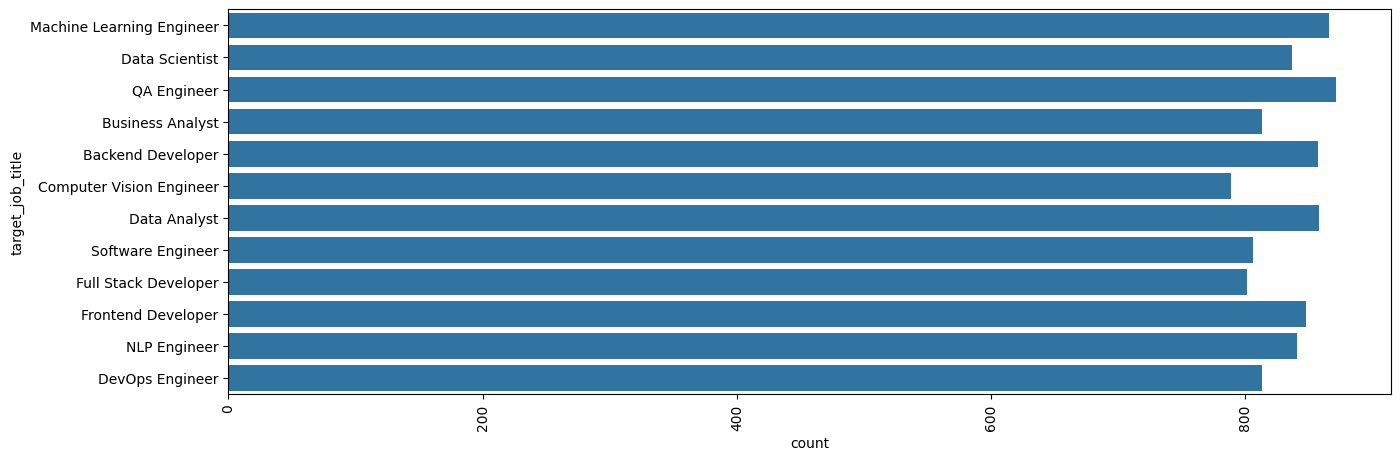

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(new_dataset['target_job_title'])
plt.xticks(rotation=90)
plt.show()

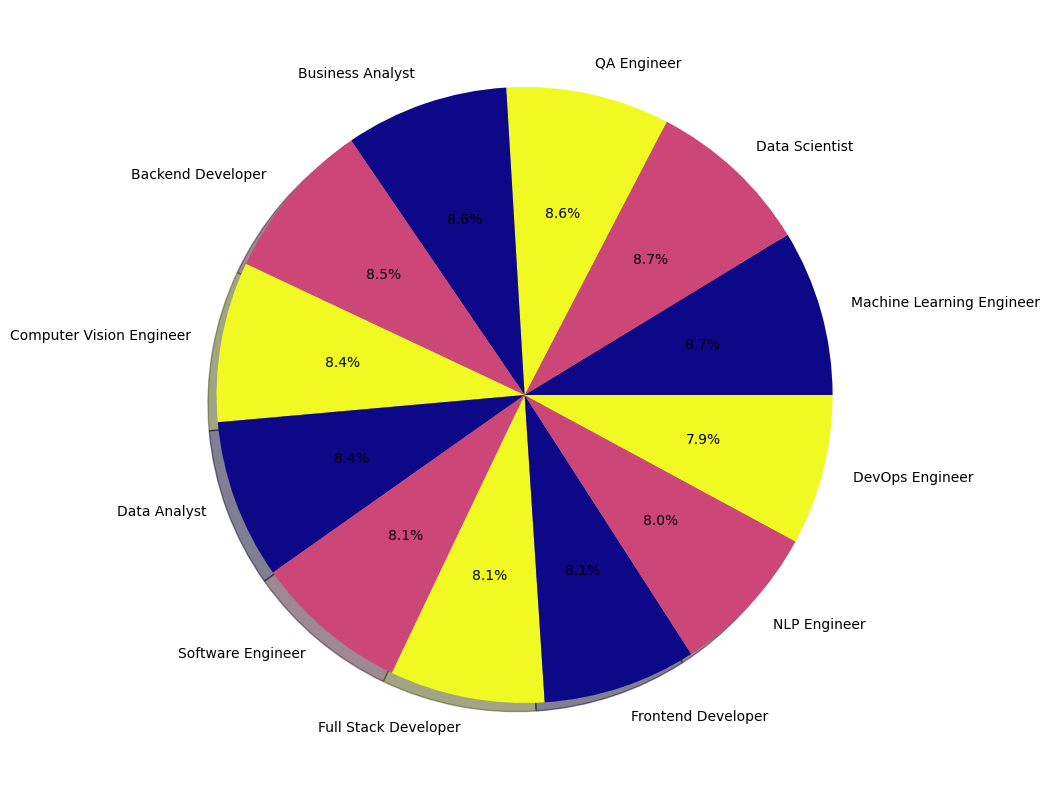

In [27]:
counts = new_dataset['target_job_title'].value_counts()
labels = new_dataset['target_job_title'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [28]:
final_dataset.isnull().sum()

id                 0
clean_summary      0
clean_job_title    0
clean_education    0
clean_skills       0
dtype: int64

In [29]:
final_dataset.duplicated().count()

np.int64(10000)

#balancing the dataset

In [30]:
final_dataset['clean_job_title'].value_counts()

clean_job_title
QA Engineer                  871
Machine Learning Engineer    866
Data Analyst                 858
Backend Developer            857
Frontend Developer           848
NLP Engineer                 841
Data Scientist               837
Business Analyst             813
DevOps Engineer              813
Software Engineer            806
Full Stack Developer         801
Computer Vision Engineer     789
Name: count, dtype: int64

In [31]:
final_dataset.head()

,id,clean_summary,clean_job_title,clean_education,clean_skills
0,1,Passionate Machine Learning Engineer 3 years e...,Machine Learning Engineer,Tech Computer Science Delhi University 2017,Azure Git Python Tableau PyTorch
1,2,11 year experienced Data Scientist strong back...,Data Scientist,Tech Computer Science NIT 2021,Tableau NumPy Docker Pandas Model Deployment D...
2,3,Passionate QA Engineer 2 years experience data...,QA Engineer,Sc Statistics IIT 2023,Regex Keras TensorFlow AWS Docker Machine Lear...
3,4,11 year experienced Business Analyst strong ba...,Business Analyst,B Sc Computer Science VIT 2018,Tableau Machine Learning Regex Power BI Kubern...
4,5,QA Engineer skilled Data Visualization Linux N...,QA Engineer,BCA Delhi University 2010,Data Visualization Linux NLP NumPy Deep Learni...


In [32]:
final_dataset['clean_summary'].apply(lambda x: x.split())



0       [Passionate, Machine, Learning, Engineer, 3, y...
1       [11, year, experienced, Data, Scientist, stron...
2       [Passionate, QA, Engineer, 2, years, experienc...
3       [11, year, experienced, Business, Analyst, str...
4       [QA, Engineer, skilled, Data, Visualization, L...
                              ...                        
9995    [Computer, Vision, Engineer, skilled, SQL, PyT...
9996    [7, year, experienced, Data, Scientist, strong...
9997    [NLP, Engineer, skilled, Feature, Engineering,...
9998    [2, year, experienced, QA, Engineer, strong, b...
9999    [8, year, experienced, QA, Engineer, strong, b...
Name: clean_summary, Length: 10000, dtype: object

In [33]:
final_dataset['clean_job_title'].apply(lambda x: x.split())

0       [Machine, Learning, Engineer]
1                   [Data, Scientist]
2                      [QA, Engineer]
3                 [Business, Analyst]
4                      [QA, Engineer]
                    ...              
9995     [Computer, Vision, Engineer]
9996                [Data, Scientist]
9997                  [NLP, Engineer]
9998                   [QA, Engineer]
9999                   [QA, Engineer]
Name: clean_job_title, Length: 10000, dtype: object

In [34]:
final_dataset['clean_education'].apply(lambda x: x.split())

0       [Tech, Computer, Science, Delhi, University, 2...
1                    [Tech, Computer, Science, NIT, 2021]
2                             [Sc, Statistics, IIT, 2023]
3                   [B, Sc, Computer, Science, VIT, 2018]
4                          [BCA, Delhi, University, 2010]
                              ...                        
9995           [B, E, Information, Technology, VIT, 2011]
9996            [Data, Science, Mumbai, University, 2014]
9997    [Tech, Computer, Science, Mumbai, University, ...
9998    [B, Tech, Computer, Science, Delhi, University...
9999        [Tech, Computer, Science, BITS, Pilani, 2012]
Name: clean_education, Length: 10000, dtype: object

In [35]:
final_dataset['clean_skills'].apply(lambda x: x.split())

0                  [Azure, Git, Python, Tableau, PyTorch]
1       [Tableau, NumPy, Docker, Pandas, Model, Deploy...
2       [Regex, Keras, TensorFlow, AWS, Docker, Machin...
3       [Tableau, Machine, Learning, Regex, Power, BI,...
4       [Data, Visualization, Linux, NLP, NumPy, Deep,...
                              ...                        
9995                          [SQL, PyTorch, Docker, NLP]
9996    [Feature, Engineering, Regex, NLP, Azure, Tabl...
9997    [Feature, Engineering, Hadoop, scikit, learn, ...
9998                            [Python, Regex, SQL, GCP]
9999    [Feature, Engineering, Tableau, Statistics, Te...
Name: clean_skills, Length: 10000, dtype: object

In [36]:
final_dataset['overview']= final_dataset['clean_summary']+final_dataset['clean_education']+final_dataset['clean_skills']

C:\Users\dellll\AppData\Local\Temp\ipykernel_14592\1549610156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['overview']= final_dataset['clean_summary']+final_dataset['clean_education']+final_dataset['clean_skills']


In [37]:
final_dataset.head()

,id,clean_summary,clean_job_title,clean_education,clean_skills,overview
0,1,Passionate Machine Learning Engineer 3 years e...,Machine Learning Engineer,Tech Computer Science Delhi University 2017,Azure Git Python Tableau PyTorch,Passionate Machine Learning Engineer 3 years e...
1,2,11 year experienced Data Scientist strong back...,Data Scientist,Tech Computer Science NIT 2021,Tableau NumPy Docker Pandas Model Deployment D...,11 year experienced Data Scientist strong back...
2,3,Passionate QA Engineer 2 years experience data...,QA Engineer,Sc Statistics IIT 2023,Regex Keras TensorFlow AWS Docker Machine Lear...,Passionate QA Engineer 2 years experience data...
3,4,11 year experienced Business Analyst strong ba...,Business Analyst,B Sc Computer Science VIT 2018,Tableau Machine Learning Regex Power BI Kubern...,11 year experienced Business Analyst strong ba...
4,5,QA Engineer skilled Data Visualization Linux N...,QA Engineer,BCA Delhi University 2010,Data Visualization Linux NLP NumPy Deep Learni...,QA Engineer skilled Data Visualization Linux N...


In [38]:
final_dataset.iloc[4].overview

'QA Engineer skilled Data Visualization Linux NLP 8 years experience building scalable systems deriving business insightsBCA Delhi University 2010Data Visualization Linux NLP NumPy Deep Learning Kubernetes'

In [39]:
final_dataset=final_dataset[["id","clean_job_title","overview"]]

In [40]:
final_dataset.head()

,id,clean_job_title,overview
0,1,Machine Learning Engineer,Passionate Machine Learning Engineer 3 years e...
1,2,Data Scientist,11 year experienced Data Scientist strong back...
2,3,QA Engineer,Passionate QA Engineer 2 years experience data...
3,4,Business Analyst,11 year experienced Business Analyst strong ba...
4,5,QA Engineer,QA Engineer skilled Data Visualization Linux N...


In [41]:
print(y.nunique(), len(y))
print(y.value_counts().head(10))


NameError: name 'y' is not defined

In [42]:
final_dataset.head()

,id,clean_job_title,overview
0,1,Machine Learning Engineer,Passionate Machine Learning Engineer 3 years e...
1,2,Data Scientist,11 year experienced Data Scientist strong back...
2,3,QA Engineer,Passionate QA Engineer 2 years experience data...
3,4,Business Analyst,11 year experienced Business Analyst strong ba...
4,5,QA Engineer,QA Engineer skilled Data Visualization Linux N...


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Example: suppose df is already loaded
# X = features (text), y = labels (categories)
X = final_dataset["overview"]      # input text column
y = final_dataset["clean_job_title"]             # target/label column

# 2) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Vectorize text
tfidf = TfidfVectorizer(min_df=2, max_features=5000,
                        stop_words="english", ngram_range=(1, 3))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 4) Train model
model = LogisticRegression(class_weight="balanced", max_iter=1000)
model.fit(X_train_tfidf, y_train)

# 5) Predict & evaluate
y_pred = model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


                           precision    recall  f1-score   support

        Backend Developer       1.00      1.00      1.00       171
         Business Analyst       1.00      1.00      1.00       163
 Computer Vision Engineer       1.00      1.00      1.00       158
             Data Analyst       1.00      1.00      1.00       172
           Data Scientist       1.00      1.00      1.00       167
          DevOps Engineer       1.00      1.00      1.00       163
       Frontend Developer       1.00      1.00      1.00       170
     Full Stack Developer       1.00      1.00      1.00       160
Machine Learning Engineer       1.00      1.00      1.00       173
             NLP Engineer       1.00      1.00      1.00       168
              QA Engineer       1.00      1.00      1.00       174
        Software Engineer       1.00      1.00      1.00       161

                 accuracy                           1.00      2000
                macro avg       1.00      1.00      1.00    

Accuracy: 1.0
                           precision    recall  f1-score   support

        Backend Developer       1.00      1.00      1.00       171
         Business Analyst       1.00      1.00      1.00       163
 Computer Vision Engineer       1.00      1.00      1.00       158
             Data Analyst       1.00      1.00      1.00       172
           Data Scientist       1.00      1.00      1.00       167
          DevOps Engineer       1.00      1.00      1.00       163
       Frontend Developer       1.00      1.00      1.00       170
     Full Stack Developer       1.00      1.00      1.00       160
Machine Learning Engineer       1.00      1.00      1.00       173
             NLP Engineer       1.00      1.00      1.00       168
              QA Engineer       1.00      1.00      1.00       174
        Software Engineer       1.00      1.00      1.00       161

                 accuracy                           1.00      2000
                macro avg       1.00      1.00

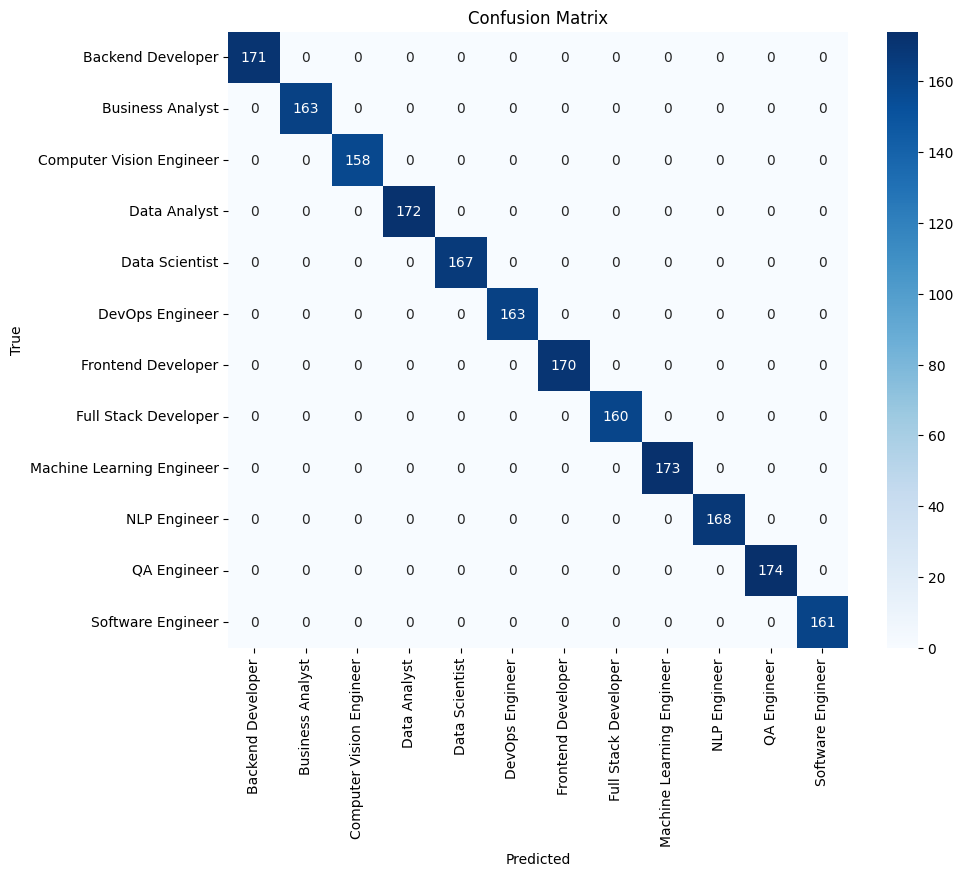

In [44]:
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

# Step 4: Accuracy Evaluation
y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

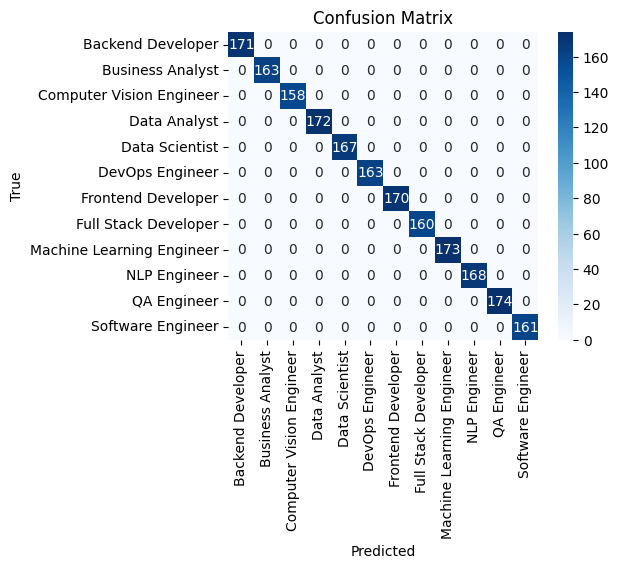

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Create the pipeline
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=2, max_features=5000,
                              stop_words='english', ngram_range=(1,3))),
    ('rf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))])

# Train the pipeline
pipe.fit(X_train, y_train)

# Predict probabilities for first 10 test samples
probs = pipe.predict_proba(X_test[:10])

# Print classes and predicted probabilities
print(pipe.classes_)
print(probs[:5])



['Backend Developer' 'Business Analyst' 'Computer Vision Engineer'
 'Data Analyst' 'Data Scientist' 'DevOps Engineer' 'Frontend Developer'
 'Full Stack Developer' 'Machine Learning Engineer' 'NLP Engineer'
 'QA Engineer' 'Software Engineer']
[[0.   0.01 0.   0.03 0.93 0.01 0.   0.01 0.   0.01 0.   0.  ]
 [0.   0.   0.   0.03 0.97 0.   0.   0.   0.   0.   0.   0.  ]
 [0.88 0.   0.01 0.01 0.01 0.   0.02 0.06 0.   0.01 0.   0.  ]
 [0.   0.9  0.   0.05 0.02 0.   0.   0.02 0.   0.   0.   0.01]
 [0.   0.   0.01 0.01 0.95 0.   0.01 0.01 0.   0.01 0.   0.  ]]


In [47]:
print(y.value_counts())


clean_job_title
QA Engineer                  871
Machine Learning Engineer    866
Data Analyst                 858
Backend Developer            857
Frontend Developer           848
NLP Engineer                 841
Data Scientist               837
Business Analyst             813
DevOps Engineer              813
Software Engineer            806
Full Stack Developer         801
Computer Vision Engineer     789
Name: count, dtype: int64


In [48]:
final_dataset.iloc[222].overview

'0 year experienced Computer Vision Engineer strong background Deep Learning Statistics Regex Delivered end end ML solutions productionized modelsData Science SRM University 2014Deep Learning Statistics Regex Git Python Model Deployment GCP Pandas scikit learn'

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

resume_text ="""Objective:
Software Engineer passionate about building scalable web applications and backend systems.

Education:
- B.Tech in Computer Science, IIT Kanpur, GPA: 8.5/10

Skills:
- Python, Java, C++
- Django, Flask, Spring Boot
- REST APIs, Microservices
- Git, Docker, Kubernetes

Experience:
Software Engineer | TechSoft Ltd.
- Developed backend APIs in Django to support mobile applications.
- Implemented microservices architecture using Docker and Kubernetes.
- Collaborated with frontend team to build seamless web applications.

Projects:
- E-commerce web application
- Online exam portal
"""
def predict_category(resume_text):
    resume_text = cleanResume(resume_text)  # make sure this function exists
    resume_tfidf = tfidf.transform([resume_text])  # use the trained TF-IDF
    predicted_category = rf_classifier.predict(resume_tfidf)[0]  # use trained classifier
    return predicted_category

predicted_category = predict_category(resume_text)
print("Predicted Category:", predicted_category)

Predicted Category: Software Engineer


In [50]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# ----------------------------
# 1️⃣ Sample resume text
# ----------------------------
resume_text = """Objective:
Software Engineer passionate about building scalable web applications and backend systems.

Education:
- B.Tech in Computer Science, IIT Kanpur, GPA: 8.5/10

Skills:
- Python, Java, C++
- Django, Flask, Spring Boot
- REST APIs, Microservices
- Git, Docker, Kubernetes

Experience:
Software Engineer | TechSoft Ltd.
- Developed backend APIs in Django to support mobile applications.
- Implemented microservices architecture using Docker and Kubernetes.
- Collaborated with frontend team to build seamless web applications.

Projects:
- E-commerce web application
- Online exam portal
"""

# ----------------------------
# 2️⃣ Feature Extraction Functions
# ----------------------------
def extract_email(text):
    match = re.findall(r'\S+@\S+', text)
    return match[0] if match else None

def extract_phone(text):
    match = re.findall(r'\+?\d[\d\s\-]{7,}\d', text)
    return match[0] if match else None

def extract_skills(text, skill_list=None):
    if not skill_list:
        # default common tech skills
        skill_list = ['python','java','c++','django','flask','spring boot',
                      'rest apis','microservices','git','docker','kubernetes',
                      'tensorflow','pandas','numpy','scikit-learn','sql']
    text_lower = text.lower()
    skills_found = [skill for skill in skill_list if skill in text_lower]
    return skills_found

def extract_education(text):
    edu_keywords = ['b.tech', 'bachelor', 'm.tech', 'master', 'phd', 'msc', 'bsc']
    lines = text.lower().split('\n')
    education = [line.strip() for line in lines if any(k in line for k in edu_keywords)]
    return education

# ----------------------------
# 3️⃣ Clean Resume Text
# ----------------------------
def cleanResume(text):
    # lowercase
    text = text.lower()
    # remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    # remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# ----------------------------
# 4️⃣ Prediction Function
# ----------------------------
def predict_resume(resume_text):
    # 4a. Feature Extraction
    email = extract_email(resume_text)
    phone = extract_phone(resume_text)
    skills = extract_skills(resume_text)
    education = extract_education(resume_text)

    # 4b. Clean and TF-IDF Transform
    resume_cleaned = cleanResume(resume_text)
    resume_tfidf = tfidf.transform([resume_cleaned])  # tfidf = trained TfidfVectorizer
    predicted_category = rf_classifier.predict(resume_tfidf)[0]  # rf_classifier = trained classifier

    # 4c. Return all
    return {
        'predicted_category': predicted_category,
        'email': email,
        'phone': phone,
        'skills': skills,
        'education': education
    }

# ----------------------------
# 5️⃣ Run Prediction
# ----------------------------
result = predict_resume(resume_text)
print(result)


{'predicted_category': 'Software Engineer', 'email': None, 'phone': None, 'skills': ['python', 'java', 'c++', 'django', 'flask', 'spring boot', 'rest apis', 'microservices', 'git', 'docker', 'kubernetes'], 'education': ['- b.tech in computer science, iit kanpur, gpa: 8.5/10']}


In [54]:
import pickle
import os

# Make a 'models' folder next to App.py
if not os.path.exists("models"):
    os.makedirs("models")


# Save TF-IDF
with open("models/tfidf_vectorizer_categorization.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Save Model
with open("models/rf_pipeline_categorization.pkl", "wb") as f:
    pickle.dump(rf_classifier, f)

print("✅ Model and TF-IDF saved successfully!")


✅ Model and TF-IDF saved successfully!


In [ ]:
import os
print(os.getcwd())


C:\Users\dellll
